# Курсовой проект

## Обучение модели. Часть 1.

Реализация rest api на базе flask

- dataset: https://www.kaggle.com/vikasukani/diabetes-data-set
- Данные о предсказании наличия диабета у пациентов. 
- model: AdaBoostClassifier

Как использовать:
1. С помощью Model_creation.ipynb обучить модель на данных diabetes-dataset.csv и сохранить в ada_model.dill
2. Используя run_server.py запустить сервер в терминале командой "python run_server.py" либо через IDE.
3. Запустив сервер, с помощью Prediction.ipynb можно обращаться к api

In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, precision_score, accuracy_score, f1_score, recall_score
import dill

In [2]:
data = pd.read_csv('diabetes-dataset.csv')
features = ['Pregnancies', 'Glucose', 'BloodPressure', \
            'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = ['Outcome']

- <b>Pregnancies</b> - the condition of being pregnant.
- <b>Glucose</b> - A simple monosaccharide (sugar)
- <b>BloodPressure</b> - Blood pressure is the force of your blood pushing against the walls of your arteries. Each time your heart beats, it pumps blood into the arteries.
- <b>SkinThickness</b> - We measured skin thickness in 66 IDDM patients aged 24–38 yr and investigated whether it correlated with long-term glycemic control and the presence of certain
- <b>Insulin</b> - A polypeptide hormone that regulates carbohydrate metabolism.
- <b>BMI</b> - Inclusion-body myositis (IBM) primarily affects men,
- <b>DiabetesPedigreeFunction</b> - a function which scores likelihood of diabetes based on family history
- <b>Age</b> - patient age (years)
- <b>Outcome</b> - target feature (0 if non-diabetic, 1 if diabetic)

Посмотрим на корреляции признаков:

In [3]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


Видим более или менее значимые корреляции между:
- Age и Pregnancies
- Insulin и SkinThickness
- BMI и SkinThickness

Касательно таргета наибольшая линейная зависимость есть между:
- Outcome и Glucose

наименьшая линейная зависимость между:
- Outcome и BloodPressure

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2)

X_test.to_csv("X_test.csv", index=None)
y_test.to_csv("y_test.csv", index=None)
X_train.to_csv("X_train.csv", index=None)
y_train.to_csv("y_train.csv", index=None)

In [15]:
model = AdaBoostClassifier(learning_rate=0.4, n_estimators=1000, random_state=42)

In [16]:
model.fit(X_train, y_train)

/Users/tomas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(learning_rate=0.4, n_estimators=1000, random_state=42)

In [17]:
preds = model.predict_proba(X_test)[:, 1]

In [8]:
def evaluate_model(y_test, y_predict_proba, f_beta=1):
    precision, recall, thresholds = precision_recall_curve(y_test, y_predict_proba)
    fscore = ( (1 + f_beta**2) * precision * recall) / (f_beta**2 * precision + recall)
    ix = np.argmax(fscore)
    print(f'fscore: {fscore[ix]}\nprecision: {precision[ix]}\nrecall: {recall[ix]}')
    plt.figure(figsize=(10, 5))
    plt.plot(fscore);
    plt.plot(precision);
    plt.plot(recall);
    plt.ylabel('fscore')
    plt.legend(['fscore', 'precision', 'recall'])
    return

fscore: 0.8058608058608059
precision: 0.7971014492753623
recall: 0.8148148148148148


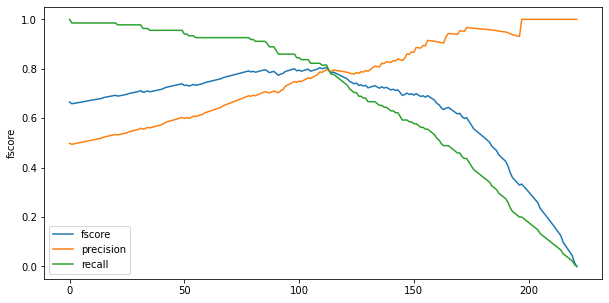

In [18]:
evaluate_model(y_test, preds)

In [19]:
with open("ada_model.dill", "wb") as f:
    dill.dump(model, f)